In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.stats import kstest,ks_2samp
from scipy import signal
from statsmodels.distributions.empirical_distribution import ECDF

In [252]:
data = pd.read_excel('../data/point25.xlsx')

In [253]:
data.head()

,TimeStamp,Channel00,Channel01,Channel02,Channel03,Channel04,Channel05,Channel06,Channel07,Channel08,...,Channel11,Channel12,Channel13,Channel14,Channel15,ClosestFrameTime,X,Y,CacheFileName,CacheFrameNumber
0,131340715885550000,-0.221555,1.068351,-0.026952,-0.021692,0.431287,-0.149236,-0.134444,-0.411228,0.042080,...,-0.025965,0.160749,-0.149894,-0.010844,4.968972,NaN,NaN,NaN,NaN,NaN
1,131340715885560000,-0.237334,1.098593,-0.038457,-0.044703,0.101907,-0.114063,-0.116364,-0.332334,0.039450,...,-0.030896,0.142669,-0.146278,-0.012488,4.970616,NaN,NaN,NaN,NaN,NaN
2,131340715885570000,-0.245552,1.132451,-0.036485,-0.071658,-0.138060,-0.091381,-0.103215,-0.267905,0.024987,...,-0.034841,0.131164,-0.146278,-0.010187,4.972260,NaN,NaN,NaN,NaN,NaN
3,131340715885580000,-0.249825,1.164666,-0.033855,-0.082834,-0.275465,-0.080533,-0.100257,-0.232403,0.013153,...,-0.015775,0.126562,-0.140689,-0.012817,4.971602,NaN,NaN,NaN,NaN,NaN
4,131340715885590000,-0.249496,1.193922,-0.035498,-0.084807,-0.402023,-0.067056,-0.085464,-0.190655,0.006578,...,-0.012488,0.123274,-0.141018,-0.013145,4.970945,NaN,NaN,NaN,NaN,NaN


In [254]:
abl_p = data.iloc[:, 12:13]
abl_d = data.iloc[:, 13:14]
cs_p = data.iloc[:, 4:5]
signal_abld = abl_d.values
signal_csp = cs_p.values
signal_ablp = abl_p.values

In [255]:
signal_abld = signal_abld.ravel()
signal_csp = signal_csp.ravel()
signal_ablp = signal_ablp.ravel()

kernal = 11
signal_abld = scipy.signal.medfilt(signal_abld, kernal) 
signal_csp = scipy.signal.medfilt(signal_csp, kernal) 
signal_ablp = scipy.signal.medfilt(signal_ablp, kernal) 

In [256]:
def fft_compare(signal_1, signal_2):
    N = len(signal_1) # Number of sample points
    # T = 0.001  # sample spacing
    T = 0.002
 
    signal_1 = signal_1 - np.mean(signal_1)
    signal_2 = signal_2 - np.mean(signal_2)
    
    fft_1 = fft(signal_1)
    fft_2 = fft(signal_2)
    
    x_axis = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    fft_val_1 = 2 / N * np.abs(fft_1[0: N // 2])
    fft_val_2 = 2 / N * np.abs(fft_2[0: N // 2])
    
    Normalized = 0
    if Normalized:
        fft_val_1 = fft_val_1 / sum(fft_val_1)
        fft_val_2 = fft_val_2 / sum(fft_val_2)
    
    fig = plt.figure(figsize=(12,8))
    plt.subplot(211)
    plt.plot(x_axis, fft_val_1, color='r', label='Abl distal electrode')
    plt.legend(loc="upper right")
    plt.ylabel('Magnitude')
    plt.grid(True)
    #plt.title("Spectral graph")
    plt.subplot(212)
    plt.plot(x_axis, fft_val_2,color='b',label='Cs proximal electrode')
    plt.legend(loc="upper right")
    plt.xlabel('Frequency(HZ)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

    d_stat = ks_test(fft_val_1, fft_val_2)
    print(d_stat)

In [257]:
def ks_test(fft_signal_1, fft_signal_2):
    stat = ks_2samp(fft_signal_1, fft_signal_2)
    ecdf1, ecdf2 = ECDF(fft_signal_1), ECDF(fft_signal_2)
    fig = plt.figure(figsize=(12,8))
    xs = np.linspace(min(fft_signal_1 + fft_signal_2), 
                     max(fft_signal_1 + fft_signal_2), 
                     num=10000)
    #plt.figure(figsize=(12,8))
    plt.plot(xs, ecdf1(xs), xs, ecdf2(xs))
    plt.show()
    return stat

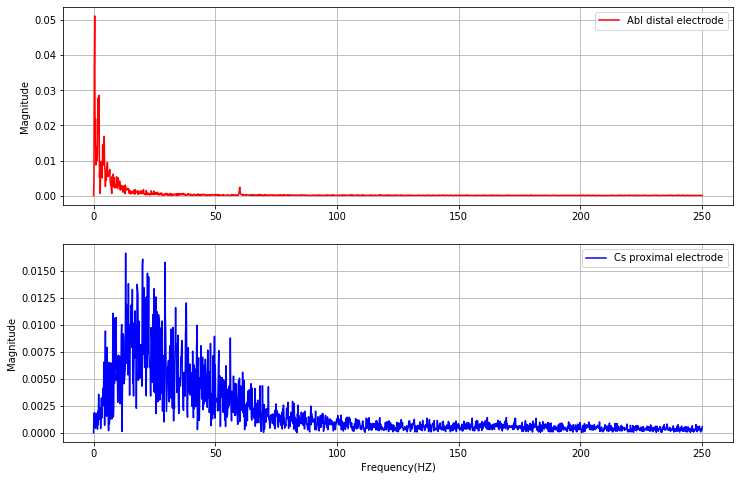

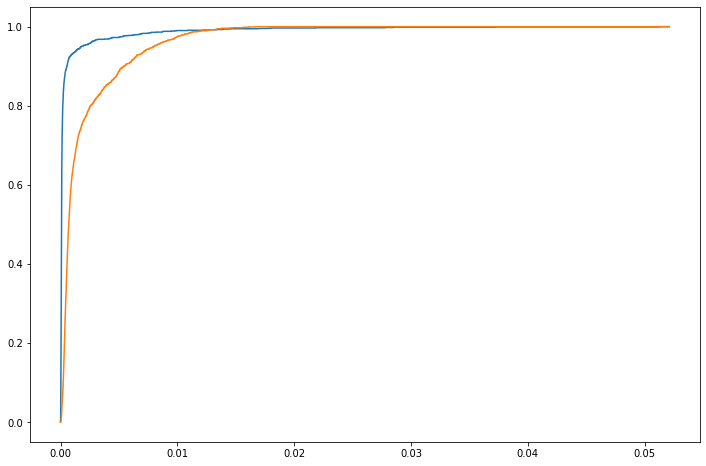

Ks_2sampResult(statistic=0.7317708333333334, pvalue=0.0)


In [258]:
signal_1 = signal_abld[:6144:2]
signal_2 = signal_csp[:6144:2]
fft_compare(signal_1, signal_2)

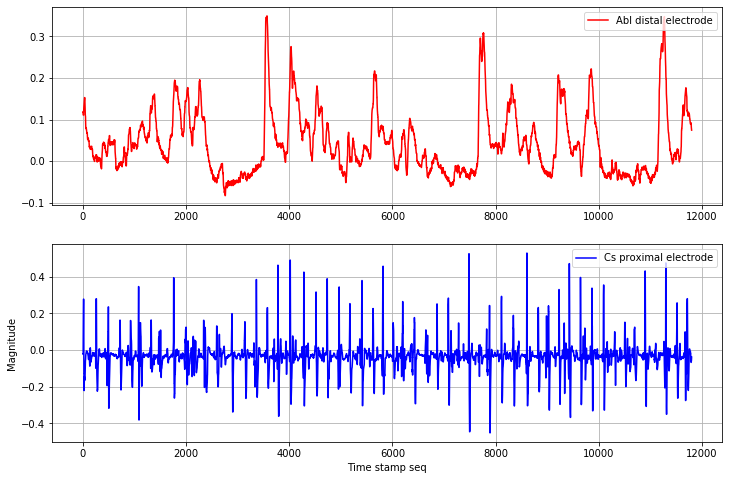

In [259]:
base = np.arange(1, len(signal_ablp)+1, 1) 

fig = plt.figure(figsize=(12,8))
#plt.subplot(311)
#plt.plot(base, signal_ablp,'g-',label = 'Abl proximal electrode')
plt.subplot(211)
plt.plot(base, signal_abld,'r-',label = 'Abl distal electrode')
plt.legend(loc='upper right')
plt.grid(True)
plt.subplot(212)
plt.plot(base, signal_csp,'b-',label = 'Cs proximal electrode')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Time stamp seq')
plt.ylabel('Magnitude')
plt.show()